In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [2]:
import matplotlib.image as image
file = './img/attack_zone.png'
logo = image.imread(file)

In [67]:
input_file = os.path.join('datasets\csv_files','2017.csv')
df = pd.read_csv(input_file)

In [13]:
df.head()

,period,period_type,period_time,gameID,attacking_team_id,attacking_team_name,play_type,shooter,goalie,shot_type,x_coordinate,y_coordinate,empty_net,strength,home_team
0,1,REGULAR,00:25,2019020001,9,Ottawa Senators,Goal,Brady Tkachuk,Frederik Andersen,Tip-In,85.0,-1.0,False,Even,Toronto Maple Leafs
1,1,REGULAR,01:31,2019020001,10,Toronto Maple Leafs,Shot,Morgan Rielly,Craig Anderson,Snap Shot,-32.0,-2.0,NaN,NaN,Toronto Maple Leafs
2,1,REGULAR,03:23,2019020001,9,Ottawa Senators,Shot,Dylan DeMelo,Frederik Andersen,Snap Shot,63.0,-6.0,NaN,NaN,Toronto Maple Leafs
3,1,REGULAR,03:56,2019020001,10,Toronto Maple Leafs,Shot,Morgan Rielly,Craig Anderson,Wrist Shot,-59.0,-20.0,NaN,NaN,Toronto Maple Leafs
4,1,REGULAR,04:47,2019020001,10,Toronto Maple Leafs,Shot,Tyson Barrie,Craig Anderson,Slap Shot,-42.0,-29.0,NaN,NaN,Toronto Maple Leafs


## Preparing Data

In [68]:
attack_df = df.copy()
# Coordinate adjustments:
attack_df.loc[df['x_coordinate'] < 0, 'x_coordinate'] = -attack_df['x_coordinate']
attack_df.loc[df['x_coordinate'] < 0, 'y_coordinate'] = -attack_df['y_coordinate']
attack_df.head()

,period,period_type,period_time,gameID,attacking_team_id,attacking_team_name,play_type,shooter,goalie,shot_type,x_coordinate,y_coordinate,empty_net,strength,home_team
0,1,REGULAR,00:38,2017020001,52,Winnipeg Jets,Shot,Josh Morrissey,Frederik Andersen,Wrist Shot,36.0,28.0,NaN,NaN,Winnipeg Jets
1,1,REGULAR,00:49,2017020001,52,Winnipeg Jets,Shot,Shawn Matthias,Frederik Andersen,Wrist Shot,75.0,-1.0,NaN,NaN,Winnipeg Jets
2,1,REGULAR,01:03,2017020001,52,Winnipeg Jets,Shot,Bryan Little,Frederik Andersen,Backhand,73.0,-10.0,NaN,NaN,Winnipeg Jets
3,1,REGULAR,01:46,2017020001,10,Toronto Maple Leafs,Shot,Eric Fehr,Steve Mason,Wrist Shot,80.0,-3.0,NaN,NaN,Winnipeg Jets
4,1,REGULAR,03:42,2017020001,52,Winnipeg Jets,Shot,Patrik Laine,Frederik Andersen,Snap Shot,44.0,21.0,NaN,NaN,Winnipeg Jets


In [605]:
# Binning
bin_size = 5

In [606]:
attack_df['x_bin'] = pd.cut(attack_df['x_coordinate'], bins=range(0, 100+bin_size, bin_size))
attack_df['y_bin'] = pd.cut(attack_df['y_coordinate'], bins=range(-45, 45+bin_size, bin_size))

In [607]:
attack_df.head()

,period,period_type,period_time,gameID,attacking_team_id,attacking_team_name,play_type,shooter,goalie,shot_type,x_coordinate,y_coordinate,empty_net,strength,home_team,x_bin,y_bin
0,1,REGULAR,00:38,2017020001,52,Winnipeg Jets,Shot,Josh Morrissey,Frederik Andersen,Wrist Shot,36.0,28.0,NaN,NaN,Winnipeg Jets,"(35, 40]","(25, 30]"
1,1,REGULAR,00:49,2017020001,52,Winnipeg Jets,Shot,Shawn Matthias,Frederik Andersen,Wrist Shot,75.0,-1.0,NaN,NaN,Winnipeg Jets,"(70, 75]","(-5, 0]"
2,1,REGULAR,01:03,2017020001,52,Winnipeg Jets,Shot,Bryan Little,Frederik Andersen,Backhand,73.0,-10.0,NaN,NaN,Winnipeg Jets,"(70, 75]","(-15, -10]"
3,1,REGULAR,01:46,2017020001,10,Toronto Maple Leafs,Shot,Eric Fehr,Steve Mason,Wrist Shot,80.0,-3.0,NaN,NaN,Winnipeg Jets,"(75, 80]","(-5, 0]"
4,1,REGULAR,03:42,2017020001,52,Winnipeg Jets,Shot,Patrik Laine,Frederik Andersen,Snap Shot,44.0,21.0,NaN,NaN,Winnipeg Jets,"(40, 45]","(20, 25]"


In [608]:
games_per_team = df.groupby('attacking_team_name')['gameID'].nunique()
games_per_team.head()

attacking_team_name
Anaheim Ducks      86
Arizona Coyotes    82
Boston Bruins      94
Buffalo Sabres     82
Calgary Flames     82
Name: gameID, dtype: int64

In [609]:
shot_ratios = attack_df.groupby(['attacking_team_name', 'x_bin', 'y_bin']).size().reset_index(name='shots')

C:\Users\mk_ya\AppData\Local\Temp\ipykernel_17944\4113095149.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [610]:
shot_ratios['shots_per_hour'] = shot_ratios['shots'] / shot_ratios['attacking_team_name'].map(games_per_team)

In [611]:
shot_ratios.head()

,attacking_team_name,x_bin,y_bin,shots,shots_per_hour
0,Anaheim Ducks,"(0, 5]","(-45, -40]",0,0.000000
1,Anaheim Ducks,"(0, 5]","(-40, -35]",5,0.058140
2,Anaheim Ducks,"(0, 5]","(-35, -30]",5,0.058140
3,Anaheim Ducks,"(0, 5]","(-30, -25]",5,0.058140
4,Anaheim Ducks,"(0, 5]","(-25, -20]",1,0.011628


In [612]:
league_avgs = shot_ratios.groupby(['x_bin', 'y_bin'])['shots_per_hour'].mean().reset_index()
league_avgs.head()

C:\Users\mk_ya\AppData\Local\Temp\ipykernel_17944\483994127.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,x_bin,y_bin,shots_per_hour
0,"(0, 5]","(-45, -40]",0.004427
1,"(0, 5]","(-40, -35]",0.026579
2,"(0, 5]","(-35, -30]",0.023060
3,"(0, 5]","(-30, -25]",0.017097
4,"(0, 5]","(-25, -20]",0.009691


In [613]:
### Check if shot_per_hour sums up to 1

## Visualization

In [621]:
shot_ratios['attacking_team_name'].unique()

array(['Anaheim Ducks', 'Arizona Coyotes', 'Boston Bruins',
       'Buffalo Sabres', 'Calgary Flames', 'Carolina Hurricanes',
       'Chicago Blackhawks', 'Colorado Avalanche',
       'Columbus Blue Jackets', 'Dallas Stars', 'Detroit Red Wings',
       'Edmonton Oilers', 'Florida Panthers', 'Los Angeles Kings',
       'Minnesota Wild', 'Montréal Canadiens', 'Nashville Predators',
       'New Jersey Devils', 'New York Islanders', 'New York Rangers',
       'Ottawa Senators', 'Philadelphia Flyers', 'Pittsburgh Penguins',
       'San Jose Sharks', 'St. Louis Blues', 'Tampa Bay Lightning',
       'Toronto Maple Leafs', 'Vancouver Canucks', 'Vegas Golden Knights',
       'Washington Capitals', 'Winnipeg Jets'], dtype=object)

In [614]:
team = 'San Jose Sharks'

In [615]:
df_vis = shot_ratios[shot_ratios['attacking_team_name']==team]
df_vis.head()

,attacking_team_name,x_bin,y_bin,shots,shots_per_hour
8280,San Jose Sharks,"(0, 5]","(-45, -40]",0,0.000000
8281,San Jose Sharks,"(0, 5]","(-40, -35]",0,0.000000
8282,San Jose Sharks,"(0, 5]","(-35, -30]",2,0.021739
8283,San Jose Sharks,"(0, 5]","(-30, -25]",0,0.000000
8284,San Jose Sharks,"(0, 5]","(-25, -20]",0,0.000000


In [616]:
df_vis['x_center'] = df_vis['x_bin'].apply(lambda x: (x.left + x.right) / 2)
df_vis['y_center'] = df_vis['y_bin'].apply(lambda x: (x.left + x.right) / 2)

C:\Users\mk_ya\AppData\Local\Temp\ipykernel_17944\2495569533.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mk_ya\AppData\Local\Temp\ipykernel_17944\2495569533.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [617]:
df_vis.head()

,attacking_team_name,x_bin,y_bin,shots,shots_per_hour,x_center,y_center
8280,San Jose Sharks,"(0, 5]","(-45, -40]",0,0.000000,2.5,-42.5
8281,San Jose Sharks,"(0, 5]","(-40, -35]",0,0.000000,2.5,-37.5
8282,San Jose Sharks,"(0, 5]","(-35, -30]",2,0.021739,2.5,-32.5
8283,San Jose Sharks,"(0, 5]","(-30, -25]",0,0.000000,2.5,-27.5
8284,San Jose Sharks,"(0, 5]","(-25, -20]",0,0.000000,2.5,-22.5


In [618]:
df_vis = df_vis.merge(league_avgs, on=['x_bin', 'y_bin'], how='left')
# Create a new column for the difference between the team's shots_per_hour and the league average
df_vis['shot_diff'] = df_vis['shots_per_hour_x'] - df_vis['shots_per_hour_y']
df_vis.head()

,attacking_team_name,x_bin,y_bin,shots,shots_per_hour_x,x_center,y_center,shots_per_hour_y,shot_diff
0,San Jose Sharks,"(0, 5]","(-45, -40]",0,0.000000,2.5,-42.5,0.004427,-0.004427
1,San Jose Sharks,"(0, 5]","(-40, -35]",0,0.000000,2.5,-37.5,0.026579,-0.026579
2,San Jose Sharks,"(0, 5]","(-35, -30]",2,0.021739,2.5,-32.5,0.023060,-0.001321
3,San Jose Sharks,"(0, 5]","(-30, -25]",0,0.000000,2.5,-27.5,0.017097,-0.017097
4,San Jose Sharks,"(0, 5]","(-25, -20]",0,0.000000,2.5,-22.5,0.009691,-0.009691


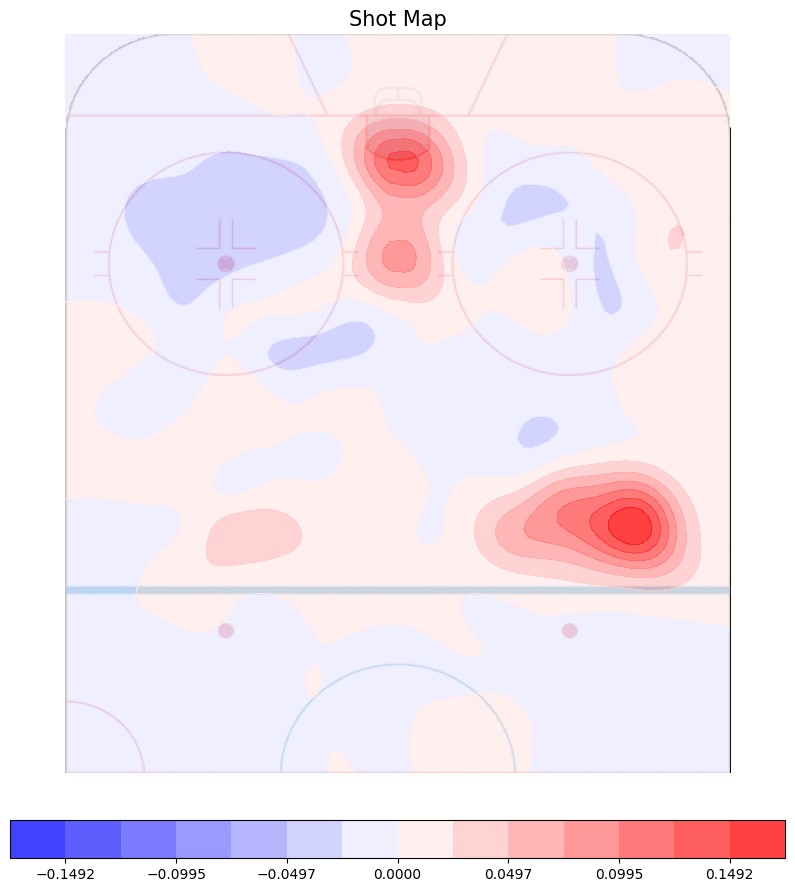

In [620]:
from scipy.ndimage import gaussian_filter
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
# Ref: https://thecommutesports.com/2022/08/06/creating-nhl-shot-maps-with-python/
[x,y] = np.round(np.meshgrid(np.linspace(-45,45,90), np.linspace(0,100,100)))
grid = griddata((df_vis['y_center'][::-1],df_vis['x_center']),df_vis['shot_diff'],(x,y),method='linear',fill_value=0)
smooothed_data = gaussian_filter(grid,sigma = 3)
data_min= smooothed_data.min()
data_max= smooothed_data.max()

if abs(data_min) > data_max:
    data_max = data_min * -1
elif data_max > abs(data_min):
    data_min = data_max * -1

fig, ax = plt.subplots(1,1, figsize=(10,12), facecolor='w', edgecolor='k')
ax.imshow(logo, extent=[x.min(), x.max(), y.min(), y.max()])
ax = ax.contourf(x,y,smooothed_data,alpha = 0.8, cmap='bwr', 
        levels = np.linspace(data_min,data_max,15),
        vmin=data_min,
        vmax=data_max,
            )
plt.axis('off')
plt.title('Shot Map',fontdict={'fontsize': 15})
fig.colorbar(ax, orientation="horizontal",pad = 0.05)
plt.show()